#Linear Regression Techniques

<small>Amogh Shreedhar Inamdar</small>

##Linear Regression

Regression is a statistical method of estimating the relationships between an outcome/response variable and several predictor variables. Linear regression attempts to model the outcome as a linear combination of predictor variables. This is mathematically represented as 
$$ y = w_0 + w_1x_1 + w_2x_2 + \cdots + \,w_nx_n $$

where $y$ is the response variable and $x_1, x_2, \ldots , x_n$ are the predictor variables respectively. 

###Simple Linear Regression

Simple Linear Regression is the most computationally and mathematically simple linear regression technique. It attempts to model a response variable in terms of a single predictor variable. This can be represented as 
$$y = \beta_0 + \beta_1x$$

The goal of regression is to find the values of the coefficients $\beta_0$ and  $\beta_1$ that define the line that best fits a plot of the response $y$ and the predictor $x$. The 'best fit' is defined with respect to some metric of quality of fit, called the error in fitting.

Several error metrics can be used, of which one of the most common is the Sum of Squares Errror (SSE) $$SSE = \sum_{i=1}^N \,(y_i - \hat y_i)^2$$
Where $y_i$ is a value of the response from the data and $\hat y_i$ is the corresponding predicted value for each of the $N$ data samples.

The coefficients for the optimal fit for the least squares metric are
$$ \beta_1 = \frac{\sum_{i=1}^N (y_i - \bar y)(x_i - \bar x)}{\sum_{i=1}^N (x_i - \bar x)^2} $$ and
$$ \beta_0 = \bar y - \beta_1\bar x$$
where $\bar y$ and $\bar x$ represent the mean values of the response and predictor variables for the given data.

Simple Linear Regression Coefficients- b0: 91.68209299226783 b1: 4.665602668786363


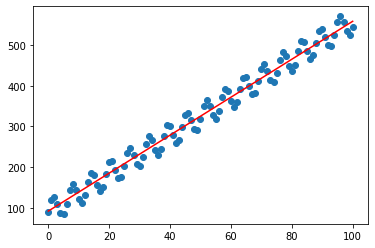

In [24]:
# simple linear regression example

import math
import numpy as np 
import matplotlib.pyplot as plt

predictor = np.array(list(range(0, 101)))  # a simple predictor variable ranging from 0 to 100
response = 90 + predictor * 4.7 + [30 * math.sin(i) for i in predictor] # a quasi-linear response variable with sinusoidal noise

plt.scatter(predictor, response)

x_bar = np.mean(predictor)
y_bar = np.mean(response)

b1 = np.sum((response-y_bar) * (predictor-x_bar)) / np.sum((predictor-x_bar) * (predictor-x_bar))  # calculate beta1 coefficient
b0 = y_bar - (b1 * x_bar)

print("Simple Linear Regression Coefficients- b0:", b0, "b1:", b1)

# plot the regression line, shown in red 
plt.plot(b0 + b1*predictor, color='red')

plt.show()

###Multiple Linear Regression

Multiple Linear Regression extends Simple Linear Regression to accomodate multiple predictor variables for the regressor variable. The regression line can be represented as $$ y = \beta_0 + \beta_1x_1 + \,\beta_2x_2 \,+ \cdots + \,\beta_nx_n $$

where $y$ is the response variable and $x_1, x_2, \ldots , x_n$ are the predictor variables respectively. 

This is often represented in matrix form as $$Y = \beta X + c$$ where $Y$ is a vector of response values, $X$ is a matrix of corresponding predictors and $\beta$ is a vector of regression coefficients.

The plots of these variables can be harder to visualize, and finding the best-fit regression line is more difficult than for simple linear regression. A closed-form solution for the least-squares estimate is  
$$\hat\beta = (X^TX)^{-1}X^TY$$ 
However, matrix inversion is an expensive operation and computing $(X^TX)^{-1}$ might be computationally infeasible. Hence, gradient-based optimization methods such as gradient descent are often used to estimate the best-fit regression line.  

The gradient (first derivative) of a function indicates the direction in which the error function changes with a change in its parameters. Gradient Descent seeks to 'descend into a valley of low error', where the magnitude of error of fit is minimum and the gradient is zero (i.e. no more error reduction is possible). It is the basis for many machine learning algorithms, such as the immensely popular Backpropagation algorithm for artificial neural networks.  
The algorithm consists of two steps: 
1. Computing the gradient for the data 
2. Descending in the direction of the gradient

This is achieved by modifying the regression coefficients in the direction of the gradient.

Multiple Linear Regression Model:
 [97.18030847] 



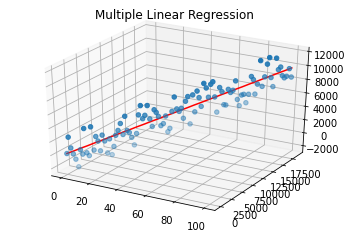

In [19]:
# multiple linear regression example

from mpl_toolkits import mplot3d
from sklearn import linear_model
import pandas as pd

p1 = np.array(list(range(0, 101)))  # the first predictor
p2 = np.array([i*187 + 50*math.cos(i) for i in range(0, 101)])  # the second predictor
r = 90 + p1*4.7 + p2*0.5 + [3000 * math.sin(p1[i]) * math.cos(p2[i]) for i in range(len(p1))] # the response variable

# make a 3D scatter plot
ax = plt.axes(projection='3d')
ax.scatter3D(p1, p2, r)

# use scikit-learn for gradient descent multiple linear regression
lm = linear_model.LinearRegression()
P = pd.DataFrame(p1, p2)  # the dataframe is just to group the predictors
mlin = lm.fit(P, r)
print("Multiple Linear Regression Model:\n", mlin.coef_, "\n")

# predict and plot the regression line
pred_mlin = mlin.predict(P)
ax.plot3D(p1, p2, pred_mlin, color='red')
ax.set_title('Multiple Linear Regression')
plt.show()

###Ridge Regression

Ridge Regression is a variation of linear regression that adds a ridge parameter that helps prevent overfitting by prioritizing important predictors. This is kown as regularization. If a large number of predictors are present, the values of each regression coefficient may skyrocket. To prevent this, the squared sum of coefficients is restricted to a value. It can be written in closed form as
$$ \hat\beta^\rm{ridge} = (X^TX + \lambda I)X^TY $$

Here, the 'ridge' term comes from the shape of the identity matrix $I$ whose diagonal of ones represents a ridge, with the value of $\lambda$ determining the penalty. This way, predictors that are less correlated with the response have their coefficients pushed close to zero.

The ridge expresses a trade-off by increasing model bias to decrease the variance of the model. This can be beneficial if prior knowledge about the data indicates that a certain bias would be favourable. The constraint can also be written as $$\beta_0^2 + \beta_1^2 + \cdots + \beta_n^2 \leq C^2$$
for some $C$, where each $\beta_i$ is the $i$'th regression coefficient. 

This is implemented in the error term, leading the Ridge Regression error to be
$$ E^\rm{ridge} = \sum_{i=1}^N \,(y_i - \hat y_i)^2 + \lambda \sum_{j=1}^p\beta_j^2 $$

where $\hat y$ is the predicted value of the response corresponding to the actual value $y$

Ridge Regression Model:
 [97.17917651] 



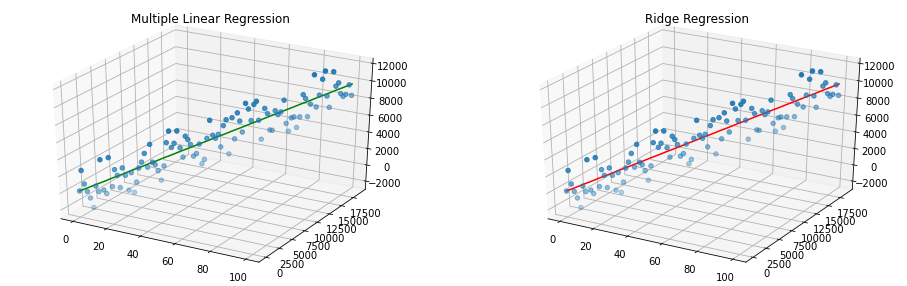

In [15]:
# ridge regression example

# make a 3D scatter plot
fig = plt.figure(figsize=(16, 5)) 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_mlin, color='green')
ax.set_title('Multiple Linear Regression')

lm = linear_model.Ridge()
ridge = lm.fit(P, r)
print("Ridge Regression Model:\n", ridge.coef_, "\n")

# predict and plot the regression line, visibly identical to the multiple linear regression line in this case
pred_ridge = ridge.predict(P)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_ridge, color='red')
ax.set_title('Ridge Regression')

plt.show()

###Lasso Regression

Like Ridge Regression above, Lasso Regression is also a form of regularization applied to Linear Regression. However, instead of constraining the sum of squares of coefficients, Lasso Regression constrains the sum of their absolute values. $$ |\beta_0| + |\beta_1| + \cdots + |\beta_n| \leq C $$
where each $\beta_i$ is a regression coefficient and $C$ is some positive constant.  

This is again implemented in the error term, leading Lasso Regression error to be 
$$ E^{lasso} = \sum_{i=1}^N \,(y_i - \hat y_i)^2 + \lambda \sum_{j=1}^p|\beta_j| $$  


The key difference between Ridge Regression and Lasso Regression is that Lasso Regression may cause some of the regression coefficients to be pushed to 0, which would mean that the corresponding predictors are eliminated from the regression model. Coefficients in Ridge Regression can only be close to 0 but never actually 0. Hence, Lasso Regression feature selection to the regression model. 

The term LASSO (often written as Lasso) is an abbreviation of Least Absolute Shrinkage and Selection Operator.

Lasso Regression Model:
 [97.179132] 



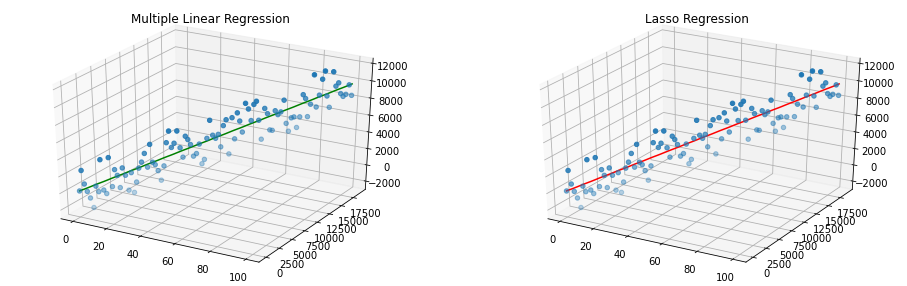

In [17]:
# lasso regression example

# make a 3D scatter plot
fig = plt.figure(figsize=(16, 5)) 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_mlin, color='green')
ax.set_title('Multiple Linear Regression')

lm = linear_model.Lasso()
lasso = lm.fit(P, r)
print("Lasso Regression Model:\n", lasso.coef_, "\n")

# predict and plot the regression line, visibly identical to the multiple linear regression line in this case
pred_lasso = lasso.predict(P)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_lasso, color='red')
ax.set_title('Lasso Regression')

plt.show()

###Elastic Net Regression

Elastic Net Regression linearly combines the Lasso Regression and Ridge Regression penalties, known as $L_1$ and $L_2$ penalties respectively. It does this to overcome the drawbacks of both regularization methods. Lasso Regression faces issues with 'large p, small n' cases were the number of predictors is greater than the number of data samples. It also usually selects only a single variable out of a group of highly correlated variables. By adding the $L_2$ penalty, the error function is made to have a unique minimum and reduces the impact of the Lasso Regression drawbacks.

This error function for Elastic Net Regression is given as 
$$ E^{lasso} = \sum_{i=1}^N \,(y_i - \hat y_i)^2 + \lambda_1 \sum_{j=1}^p|\beta_j| + \lambda_2\sum_{j=1}^p\beta_j^2 $$  

Elastic Net methods have been applied across machine learning techniques, such as with Multiple Linear Regression and Support Vector Machines.

Elastic Net Regression Model:
 [97.1225893] 



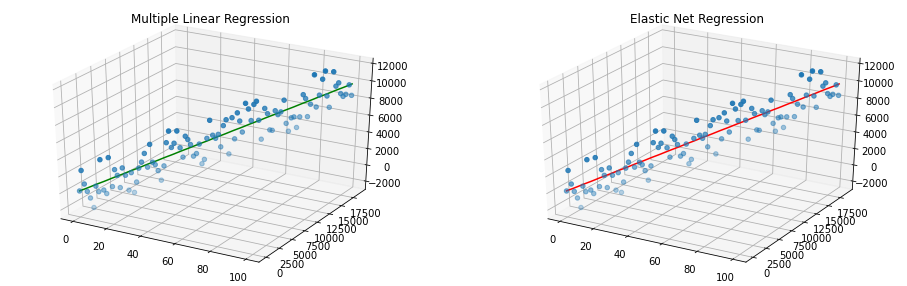

In [23]:
# elastic net regression example

# make a 3D scatter plot
fig = plt.figure(figsize=(16, 5)) 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_mlin, color='green')
ax.set_title('Multiple Linear Regression')

lm = linear_model.ElasticNet()
enet = lm.fit(P, r)
print("Elastic Net Regression Model:\n", enet.coef_, "\n")

# predict and plot the regression line, visibly identical to the multiple linear regression line in this case
pred_enet = enet.predict(P)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(p1, p2, r)
ax.plot3D(p1, p2, pred_enet, color='red')
ax.set_title('Elastic Net Regression')

plt.show()